In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
def loadDF():
    file_path = r"./data/shot_logs.csv"
    df = pd.read_csv(file_path)

    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(df['SHOT_CLOCK'].median())

    def convert_time_to_seconds(clock):
        if isinstance(clock, str):
            minutes, seconds = map(int, clock.split(":"))
            return minutes * 60 + seconds
        return None

    df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_time_to_seconds)

    df['LOCATION_NUM'] = df['LOCATION'].map({'H': 1, 'A': 0})
    df['W_NUM'] = df['W'].map({'W': 1, 'L': 0})
    
    return df

# Logistic regression


Logistic Regression - Rezultati za različite parametre
Parametri: {'C': 0.01, 'penalty': 'l2', 'max_iter': 500}, Točnost: 0.6188
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.53      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



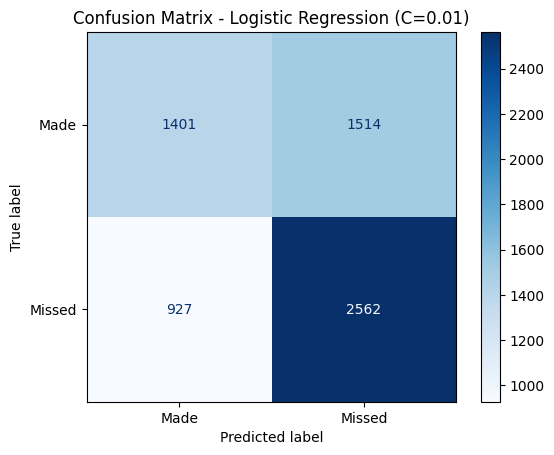

Parametri: {'C': 0.1, 'penalty': 'l2', 'max_iter': 1000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



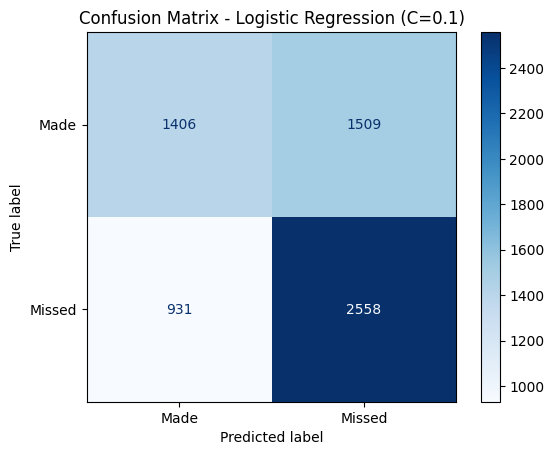

Parametri: {'C': 1.0, 'penalty': 'l2', 'max_iter': 1000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



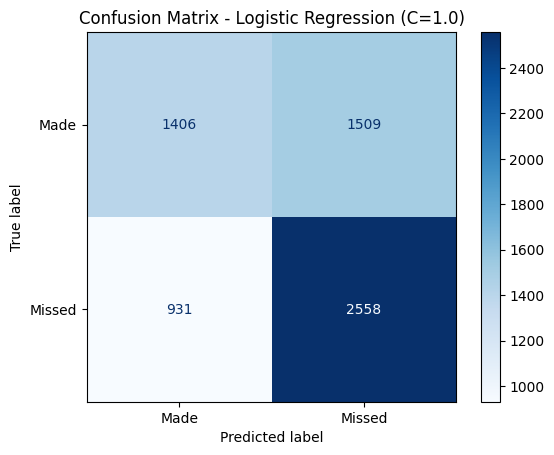

Parametri: {'C': 10, 'penalty': 'l2', 'max_iter': 2000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



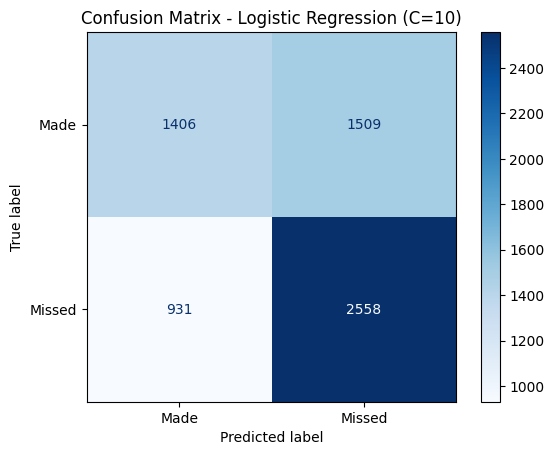

In [4]:

df = loadDF()

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

lr_params = [
    {'C': 0.01, 'penalty': 'l2', 'max_iter': 500},
    {'C': 0.1, 'penalty': 'l2', 'max_iter': 1000},
    {'C': 1.0, 'penalty': 'l2', 'max_iter': 1000},
    {'C': 10, 'penalty': 'l2', 'max_iter': 2000},
]

print("\nLogistic Regression - Rezultati za različite parametre")
for params in lr_params:
    lr_model = LogisticRegression(C=params['C'], penalty=params['penalty'], max_iter=params['max_iter'])
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lr)
    print(f"Parametri: {params}, Točnost: {acc:.4f}")
    print(classification_report(y_test, y_pred_lr))
    cm = confusion_matrix(y_test, y_pred_lr, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Logistic Regression (C={params['C']})")
    plt.show()


# SVN

Data standardization done
Data split done
Model fit done

SVM - Accuracy: 0.6112412177985949

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       698
           1       0.63      0.36      0.46       583

    accuracy                           0.61      1281
   macro avg       0.62      0.59      0.58      1281
weighted avg       0.62      0.61      0.59      1281



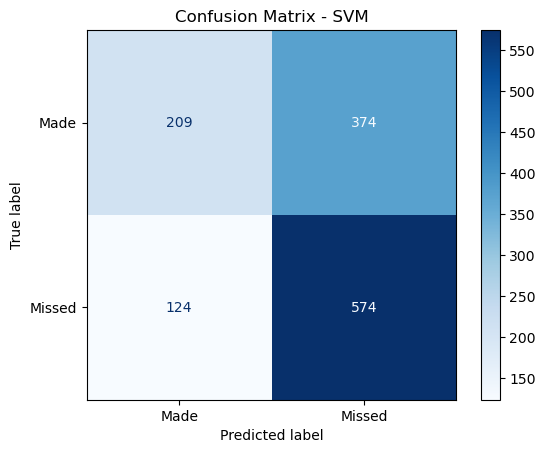

In [3]:
encoder = LabelEncoder()
df = df.sample(frac=.2, random_state=42)
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardization done")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
print("Data split done")

# SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
print("Model fit done")

y_pred = svm_model.predict(X_test)

print("\nSVM - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

# Nerual network

In [6]:
from keras import models, layers, regularizers

# Load and preprocess data
encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

# First Network: Sigmoid activation for both hidden and output layers
model1 = models.Sequential([
    layers.Dense(50, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")

print("\nFirst Network - Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

cm1 = confusion_matrix(y_test, y_pred1, labels=[1, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Made", "Missed"])
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - First Network")
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

# Druga mreža

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5771 - loss: 0.8155 - val_accuracy: 0.6113 - val_loss: 0.6949
Epoch 2/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6088 - loss: 0.6896 - val_accuracy: 0.6154 - val_loss: 0.6747
Epoch 3/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6056 - loss: 0.6769 - val_accuracy: 0.6216 - val_loss: 0.6719
Epoch 4/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6100 - loss: 0.6744 - val_accuracy: 0.6076 - val_loss: 0.6727
Epoch 5/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6109 - loss: 0.6725 - val_accuracy: 0.6208 - val_loss: 0.6705
Epoch 6/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6071 - loss: 0.6738 - val_accuracy: 0.6081 - val_loss: 0.6728
Epoch 7/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6035 - loss: 0.6728 - val_accuracy: 0.6154 - val_loss: 0.6712
Epoch 8/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6053 - loss: 0.6740 - val_accuracy: 0.6122 - val_

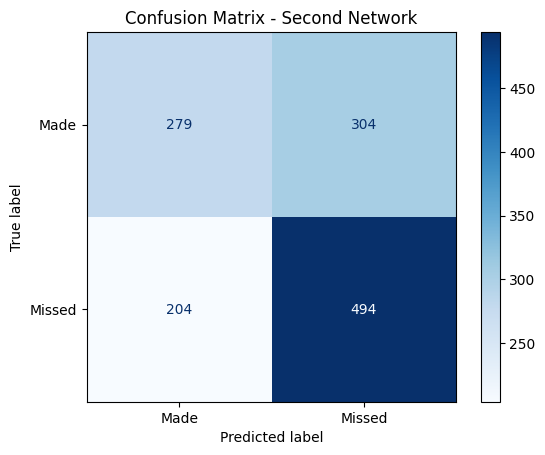

In [ ]:
# Second Network: ReLU activation for hidden layer, Sigmoid for output layer
model2 = models.Sequential([
    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")

print("\nSecond Network - Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2, labels=[1, 0])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Made", "Missed"])
disp2.plot(cmap="Blues")
plt.title("Confusion Matrix - Second Network")
plt.show()

# Naive Bayes


How much time did each combination have the best accuracy?
Addition: 162, Percentage: 16.2%, Average accuracy: 60.0984%
Multiplicative: 156, Percentage: 15.6%, Average accuracy: 60.1033%
Weighted: 682, Percentage: 68.2%, Average accuracy: 60.2562%


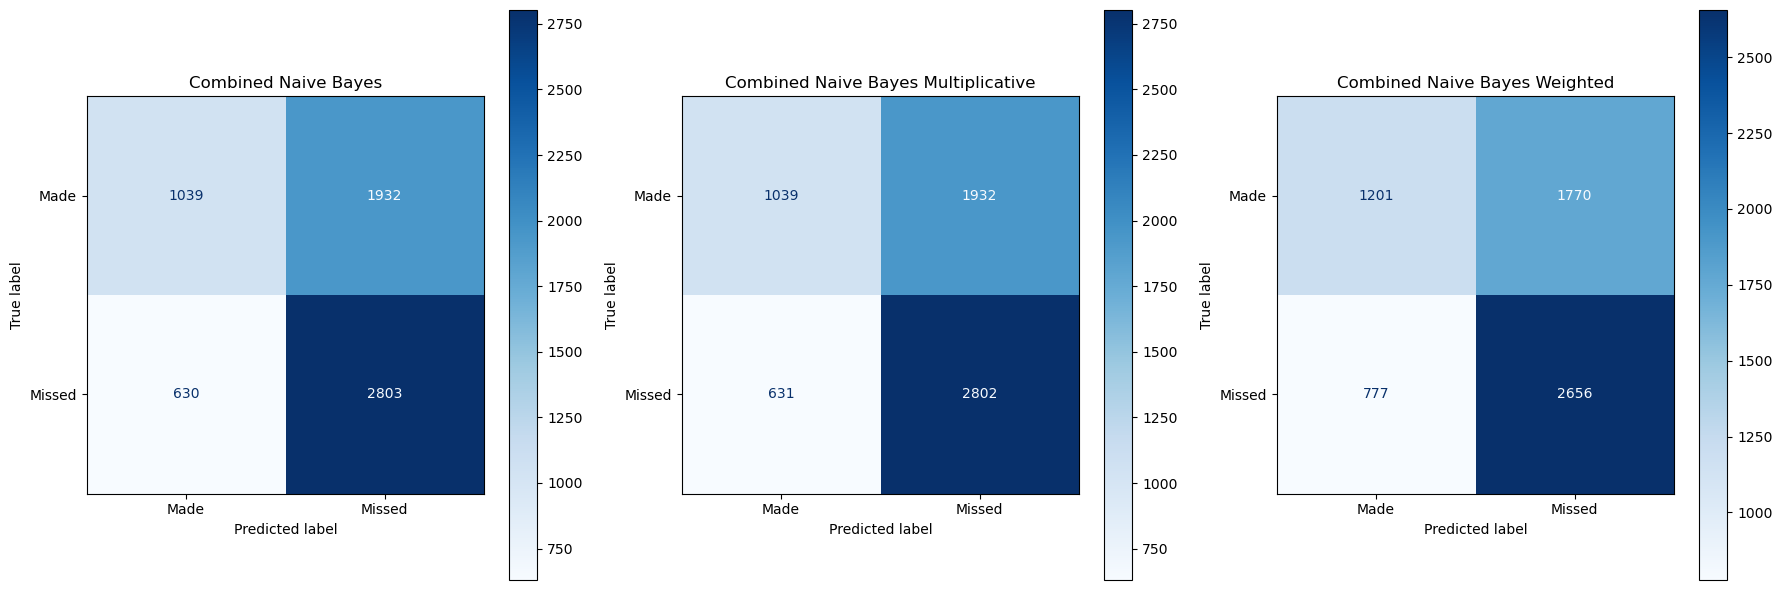

In [112]:
# Učitavamo podatke
df = loadDF()

# Rastavljamo značajke po vrsti razdiobe
gaussian_features = ['SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'FINAL_MARGIN', 'TOUCH_TIME', 'GAME_CLOCK']
multinomial_features = ['DRIBBLES', 'SHOT_NUMBER', 'PERIOD']
bernoulli_features = ['LOCATION_NUM', 'W_NUM', 'PTS_TYPE']

scaler = StandardScaler()

X_gaussian = scaler.fit_transform(df[gaussian_features])

# Multinulijeve i Bernoullijeve značajke ne treba skalirati
X_multinomial = df[multinomial_features]
df['PTS_TYPE'] = df['PTS_TYPE'].map({2: 0, 3: 1})
X_bernoulli = df[bernoulli_features]

y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

results = {0: 0, 1: 0, 2: 0}
n = 1000
accuracies = [0, 0, 0]

# Radimo n iteracija kako bi provjerili koja kombinacija distribucija daje najbolje rezultate
for i in range (n):

    X_train_gaussian, X_test_gaussian, X_train_multinomial, X_test_multinomial, X_train_bernoulli, X_test_bernoulli, y_train, y_test = train_test_split(
        X_gaussian, X_multinomial, X_bernoulli, y, test_size=0.05
    )

    # Učimo modele za svaku vrstu razdiobe
    model_g = GaussianNB()
    model_m = MultinomialNB()
    model_b = BernoulliNB()

    model_g.fit(X_train_gaussian, y_train)
    model_m.fit(X_train_multinomial, y_train)
    model_b.fit(X_train_bernoulli, y_train)

    y_pred_g = model_g.predict_proba(X_test_gaussian)
    y_pred_m = model_m.predict_proba(X_test_multinomial)
    y_pred_b = model_b.predict_proba(X_test_bernoulli)

    # Ukupnu vjerojatnost dobijemo kao zbroj vjerojatnosti svake vrste razdiobe
    combined_probs = y_pred_g + y_pred_m + y_pred_b
    combined_pred = combined_probs.argmax(axis=1)

    # Alternativno, možemo pomnožiti vjerojatnosti svake vrste razdiobe
    combined_probs_mult = y_pred_g * y_pred_m * y_pred_b
    combined_pred_mult = combined_probs_mult.argmax(axis=1)

    # Također, možemo staviti naklon prema vrsti razdiobe (ovdje su težine određene brojem značajki)
    combined_probs_weighted = (y_pred_g * 6) + (y_pred_m * 3) + (y_pred_b * 3)
    combined_pred_weighted = combined_probs_weighted.argmax(axis=1)

    tmp = [accuracy_score(y_test, combined_pred), accuracy_score(y_test, combined_pred_mult), accuracy_score(y_test, combined_pred_weighted)]
    accuracies = [sum(x) for x in zip(accuracies, tmp)]

    results[np.argmax(tmp)] += 1

print(f"\nHow much time did each combination have the best accuracy?")
print(f"Addition: {results[0]}, Percentage: {results[0] / n * 100}%, Average accuracy: {round(accuracies[0] / n * 100, 4)}%")
print(f"Multiplicative: {results[1]}, Percentage: {results[1] / n * 100}%, Average accuracy: {round(accuracies[1] / n * 100, 4)}%")
print(f"Weighted: {results[2]}, Percentage: {results[2] / n * 100}%, Average accuracy: {round(accuracies[2] / n * 100, 4)}%")

cm_combined = confusion_matrix(y_test, combined_pred, labels=[1, 0])
cm_mult = confusion_matrix(y_test, combined_pred_mult, labels=[1, 0])
cm_weighted = confusion_matrix(y_test, combined_pred_weighted, labels=[1, 0])

# Kreiramo subplotove
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prikazujemo matrice konfuzije za svaki model
disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=["Made", "Missed"])
disp_combined.plot(cmap="Blues", ax=axes[0])
axes[0].set_title(f"Combined Naive Bayes")

disp_mult = ConfusionMatrixDisplay(confusion_matrix=cm_mult, display_labels=["Made", "Missed"])
disp_mult.plot(cmap="Blues", ax=axes[1])
axes[1].set_title(f"Combined Naive Bayes Multiplicative")

disp_weighted = ConfusionMatrixDisplay(confusion_matrix=cm_weighted, display_labels=["Made", "Missed"])
disp_weighted.plot(cmap="Blues", ax=axes[2])
axes[2].set_title(f"Combined Naive Bayes Weighted")

plt.tight_layout()
plt.show()

# Subplotovi su prikaz za samo zadnju iteraciju, dok su rezultati ispod pitanja prikaz svih iteracija

# Boosting

c:\Users\vukov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



AdaBoost - Accuracy: 0.6260149906308557

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      3548
           1       0.64      0.38      0.47      2856

    accuracy                           0.63      6404
   macro avg       0.63      0.60      0.59      6404
weighted avg       0.63      0.63      0.60      6404



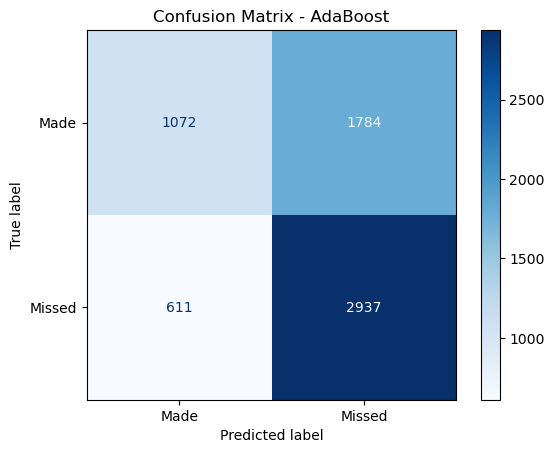

In [125]:
df = loadDF()

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

# Slabiji model
model = DecisionTreeClassifier(max_depth=3)

# Pojačavamo slabiji model
ada_model = AdaBoostClassifier(base_estimator=model, n_estimators=50)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print("\nAdaBoost - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Faster boosting

In [132]:

estimators = [50, 100, 150, 200, 250]
depths = [1, 3, 5, 7, 9]
# Provjerom learning rate-a, vidjelo se da je najbolji rezultat za 0.1 kroz više iteracija


# For loop služi samo za kontrolu, kako bi se vidjelo da li se najbolji rezultati mijenjaju
# Kako se programski kod sastoji od 4 petlje (5 x 5 x 5 = 125 iteracija), izvršavanje može potrajati pa se preporučuje zakomentirati prvi for loop
for i in range(10):
    best_accuracy = 0
    best_params = None

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

    for estimator in estimators:
        for depth in depths:
            model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth, learning_rate=0.1)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (estimator, depth)
        #print(best_params, best_accuracy)

    print(f"Best parameters: {best_params}, Accuracy: {best_accuracy}")

Best parameters: (250, 3), Accuracy: 0.6252342286071205
Best parameters: (100, 7), Accuracy: 0.6242973141786383
Best parameters: (50, 7), Accuracy: 0.6175827607745159
Best parameters: (250, 3), Accuracy: 0.6299188007495315
Best parameters: (150, 5), Accuracy: 0.6147720174890693
Best parameters: (50, 3), Accuracy: 0.6264834478450968
Best parameters: (100, 3), Accuracy: 0.6188319800124922
Best parameters: (150, 5), Accuracy: 0.6250780762023735
Best parameters: (100, 7), Accuracy: 0.6275765146783261
Best parameters: (200, 5), Accuracy: 0.6333541536539663



XGBoost - Accuracy: 0.6166458463460337

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70      3453
           1       0.66      0.35      0.46      2951

    accuracy                           0.62      6404
   macro avg       0.63      0.60      0.58      6404
weighted avg       0.63      0.62      0.59      6404



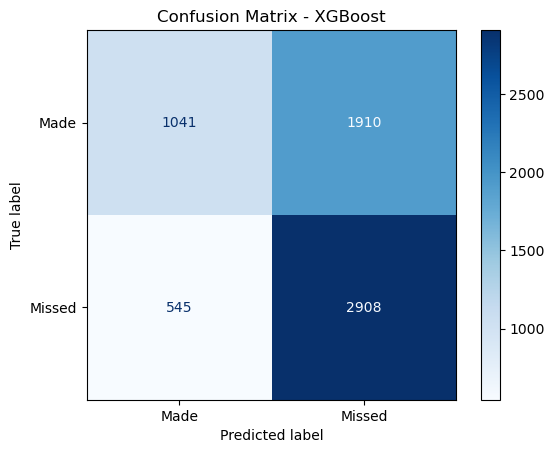

In [133]:
# Najčešće se dobivaju najbolji rezultati za n_estimators = 250 i max_depth = 3, pa ćemo na temelju toga kreirati model

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

model = xgb.XGBClassifier(n_estimators=250, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nXGBoost - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()



Random Forest - Rezultati za različite parametre
Parametri: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5}, Točnost: 0.6213
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      3489
           1       0.66      0.35      0.46      2915

    accuracy                           0.62      6404
   macro avg       0.63      0.60      0.58      6404
weighted avg       0.63      0.62      0.60      6404



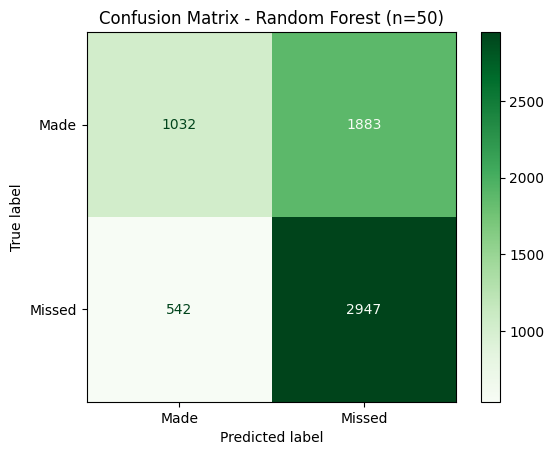

Parametri: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}, Točnost: 0.6274
              precision    recall  f1-score   support

           0       0.61      0.86      0.72      3489
           1       0.68      0.35      0.46      2915

    accuracy                           0.63      6404
   macro avg       0.64      0.60      0.59      6404
weighted avg       0.64      0.63      0.60      6404



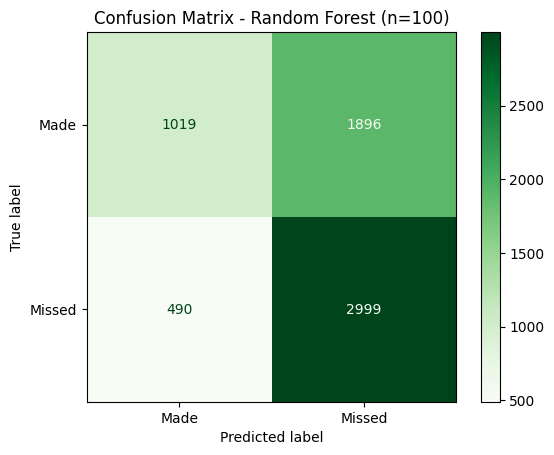

Parametri: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}, Točnost: 0.6271
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      3489
           1       0.67      0.36      0.47      2915

    accuracy                           0.63      6404
   macro avg       0.64      0.61      0.59      6404
weighted avg       0.64      0.63      0.60      6404



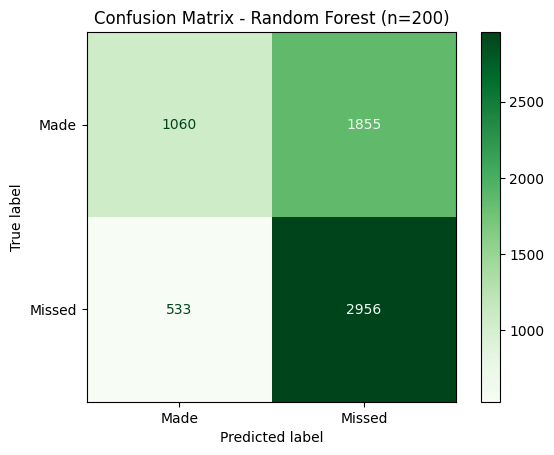

In [6]:
df = loadDF()

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

rf_params = [
    {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1},
]

print("\nRandom Forest - Rezultati za različite parametre")
for params in rf_params:
    rf_model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    print(f"Parametri: {params}, Točnost: {acc:.4f}")
    print(classification_report(y_test, y_pred_rf))
    cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - Random Forest (n={params['n_estimators']})")
    plt.show()